# AoE Training Visualization

This notebook visualizes the training progress of AoE models using the `metrics.jsonl` log file generated during training.

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
def load_metrics(log_path):
    """Load and parse metrics.jsonl file."""
    if not os.path.exists(log_path):
        print(f"File not found: {log_path}")
        return None, None
    
    train_batch_data = []
    epoch_data = []
    
    with open(log_path, 'r') as f:
        for line in f:
            try:
                record = json.loads(line)
                if record['type'] == 'train_batch':
                    train_batch_data.append(record)
                elif record['type'] == 'train_epoch':
                    epoch_data.append(record)
            except json.JSONDecodeError:
                continue
                
    df_batch = pd.DataFrame(train_batch_data)
    df_epoch = pd.DataFrame(epoch_data)
    
    return df_batch, df_epoch

In [5]:
LOG_PATH = "../output/bert_nli_aoe_Mlab1/metrics.jsonl" 

df_batch, df_epoch = load_metrics(LOG_PATH)

if df_batch is not None and not df_batch.empty:
    print(f"Loaded {len(df_batch)} batch records")
    print(f"Loaded {len(df_epoch)} epoch records")
    display(df_batch.head())

Loaded 9820 batch records
Loaded 2 epoch records


,type,global_step,run_dir,epoch,batch,train_angle,train_contrast,train_total
0,train_batch,1,output/bert_nli_aoe_Mlab1,1,1,11.581022,2.380517,82.996529
1,train_batch,2,output/bert_nli_aoe_Mlab1,1,2,16.996517,2.215484,83.461029
2,train_batch,3,output/bert_nli_aoe_Mlab1,1,3,10.275778,2.151588,74.823410
3,train_batch,4,output/bert_nli_aoe_Mlab1,1,4,9.731817,1.980682,69.152275
4,train_batch,5,output/bert_nli_aoe_Mlab1,1,5,10.779696,1.858619,66.538269


## Training Loss Curves (Per Batch)

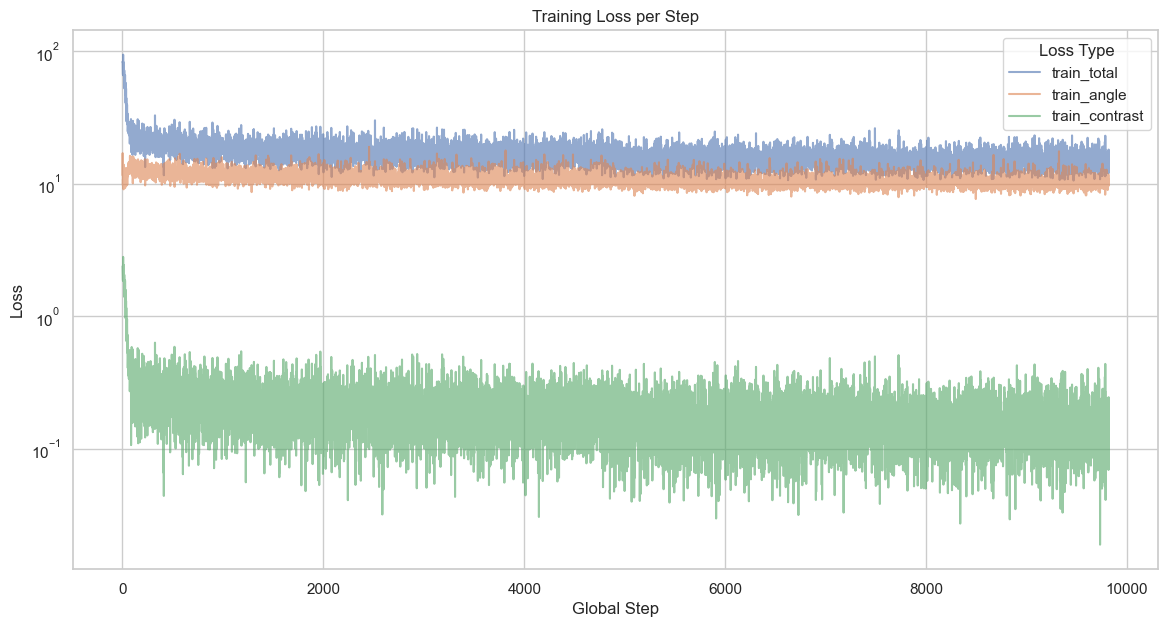

In [6]:
if df_batch is not None and not df_batch.empty:
    # Melt the dataframe for easier plotting with seaborn
    loss_cols = ['train_total', 'train_angle', 'train_contrast']
    df_melted = df_batch.melt(id_vars=['global_step'], value_vars=loss_cols, 
                              var_name='Loss Type', value_name='Loss Value')
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_melted, x='global_step', y='Loss Value', hue='Loss Type', alpha=0.6)
    plt.title('Training Loss per Step')
    plt.xlabel('Global Step')
    plt.ylabel('Loss')
    plt.yscale('log')  # Log scale often helps visualize large initial drops
    plt.show()

## Epoch-level Metrics (Train vs Eval)

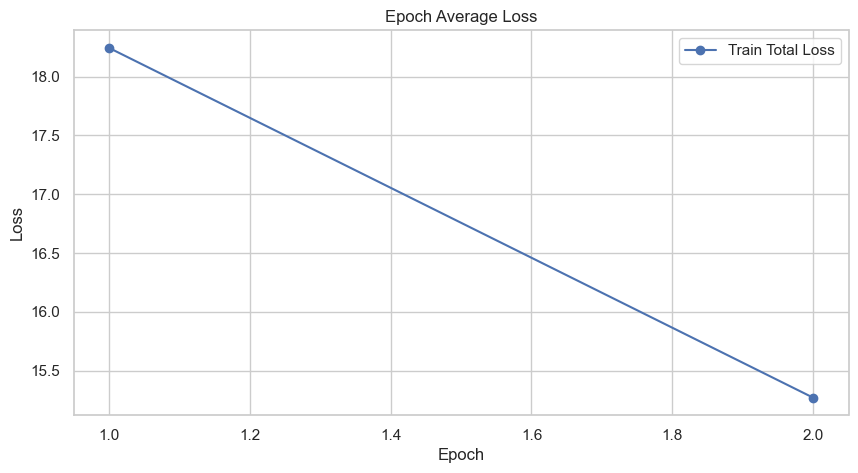

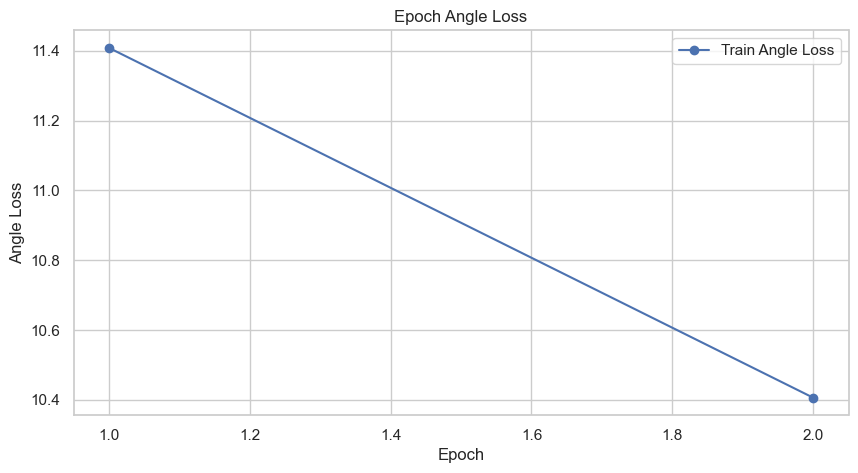

In [7]:
if df_epoch is not None and not df_epoch.empty:
    # Plot Total Loss
    plt.figure(figsize=(10, 5))
    plt.plot(df_epoch['epoch'], df_epoch['train_total'], marker='o', label='Train Total Loss')
    if 'eval_total' in df_epoch.columns:
        plt.plot(df_epoch['epoch'], df_epoch['eval_total'], marker='s', label='Eval Total Loss')
    plt.title('Epoch Average Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Angle Loss specifically if interested
    plt.figure(figsize=(10, 5))
    plt.plot(df_epoch['epoch'], df_epoch['train_angle'], marker='o', label='Train Angle Loss')
    if 'eval_angle' in df_epoch.columns:
        plt.plot(df_epoch['epoch'], df_epoch['eval_angle'], marker='s', label='Eval Angle Loss')
    plt.title('Epoch Angle Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Angle Loss')
    plt.legend()
    plt.grid(True)
    plt.show()